# DotA 2 Exploratory data analysis

## Content

1. Intro
2. Setup
3. Descriptive analysis
4. Primary data analysis
5. Geting insights
6. Predictive analysis

## Intro

Dota 2 is a multiplayer MOBA video game. Players play matches with each other. Each match involves two teams, 5 people each. One team plays for the light side (The Radiant), the other for the dark side (The Dire). The goal of each team is to destroy the main building of the enemy base (throne). <br><br>
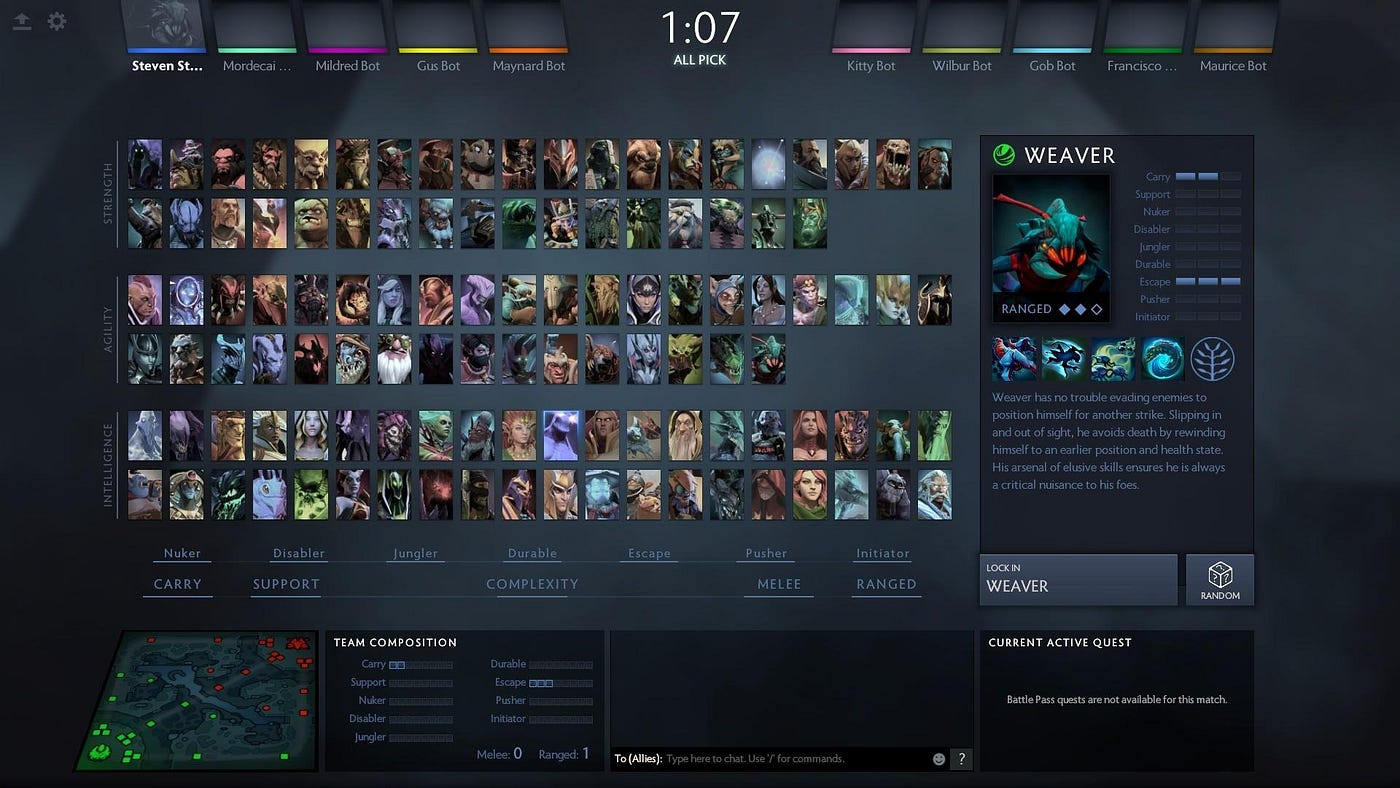
<br>
<br>
This dataset contains 50000 ranked ladder matches from the Dota 2 data dump created by Opendota.<br>
The dataset taken from __[here](https://www.kaggle.com/datasets/devinanzelmo/dota-2-matches)__

Data licence __[CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/)__

___

## Setup

In [1]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

C:\Program Files\Python39\python.exe
3.9.7 (tags/v3.9.7:1016ef3, Aug 30 2021, 20:19:38) [MSC v.1929 64 bit (AMD64)]
sys.version_info(major=3, minor=9, micro=7, releaselevel='final', serial=0)


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import os

In [5]:
print(np.__version__)
print(pd.__version__)
print(sns.__version__)

1.20.3
1.3.2
0.11.2


In [6]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [7]:
sns.set(rc={'figure.figsize':(13,9)})

___

## Data exploration

First, let's examine the contents of the files. Get a list of files in a directory:

In [8]:
os.listdir('../archive')

['ability_ids.csv',
 'ability_upgrades.csv',
 'chat.csv',
 'cluster_regions.csv',
 'hero_names.csv',
 'item_ids.csv',
 'match.csv',
 'match_outcomes.csv',
 'objectives.csv',
 'patch_dates.csv',
 'players.csv',
 'player_ratings.csv',
 'player_time.csv',
 'purchase_log.csv',
 'teamfights.csv',
 'teamfights_players.csv',
 'test_labels.csv',
 'test_player.csv',
 'yasp_sample.json']

___

Let's begin with reading table

`match_id` A unique identifier for the match. <br>
`start_time` The start time of the match in Unix time format. <br>
`duration` The duration of the match in seconds.<br>
`tower_status_radiant` A binary code representing the status of Radiant team's towers at the end of the match. <br>
`tower_status_dire` A binary code representing the status of Dire team's towers at the end of the match. <br>
`barracks_status_dire` A binary code representing the status of Dire team's barracks at the end of the match. <br>
`barracks_status_radiant` A binary code representing the status of Radiant team's barracks at the end of the match. <br>
`first_blood_time` The time in seconds when the first blood occurred in the match. <br>
`game_mode` An integer code representing the game mode of the match. <br>
`radiant_win` A boolean value representing whether the Radiant team won the match or not. <br>
`negative_votes` The number of negative votes the match received from players. <br>
`positive_votes` The number of positive votes the match received from players. <br>
`cluster` An integer code representing the cluster or region where the match was played. <br>
<br>
This table has a lot of useful metadata on the results of the match

In [9]:
df_match = pd.read_csv('../archive/match.csv')
df_match.head(5)

,match_id,start_time,duration,tower_status_radiant,tower_status_dire,barracks_status_dire,barracks_status_radiant,first_blood_time,game_mode,radiant_win,negative_votes,positive_votes,cluster
0,0,1446750112,2375,1982,4,3,63,1,22,True,0,1,155
1,1,1446753078,2582,0,1846,63,0,221,22,False,0,2,154
2,2,1446764586,2716,256,1972,63,48,190,22,False,0,0,132
3,3,1446765723,3085,4,1924,51,3,40,22,False,0,0,191
4,4,1446796385,1887,2047,0,0,63,58,22,True,0,0,156


___

`match_id` A unique identifier for the match. <br>
`account_id_0` -  `account_id_4` A unique identifier for the player. <br>
`start_time` The start time of the match in Unix time format. <br>
`parser_version` OpenDota parser number <br>
`win` Match status for the team <br>
`rad` Side status<br>
<br>
Table with data about match results

In [10]:
df_match_outcomes = pd.read_csv('../archive/match_outcomes.csv')
df_match_outcomes.head(5)

,match_id,account_id_0,account_id_1,account_id_2,account_id_3,account_id_4,start_time,parser_version,win,rad
0,1636204962,34549,0,0,-51743434,-120875154,1437014585,12,1,0
1,1636204962,0,61598,138825,0,207232,1437014585,12,0,1
2,1636322679,0,-44943233,-240360907,19599,0,1437019968,12,0,0
3,1636322679,-97530201,0,0,0,-116349387,1437019968,12,1,1
4,1637385965,0,0,0,104738,0,1437052551,12,1,0


___

`match_id` A unique identifier for the match. <br>
`times` Time from start <br>
`gold_t_0` - `gold_t_132` Earned gold <br>
`lh_t_0` - `lh_t_132` Last hits on creeeps <br>
`xp_t_0` - `xp_t_132` Earned experience <br>
<br>
Interesing table with hero progess on each 60 seconds

In [11]:
df_player_time = pd.read_csv('../archive/player_time.csv')
df_player_time.head(10)

,match_id,times,gold_t_0,lh_t_0,xp_t_0,gold_t_1,lh_t_1,xp_t_1,gold_t_2,lh_t_2,xp_t_2,gold_t_3,lh_t_3,xp_t_3,gold_t_4,lh_t_4,xp_t_4,gold_t_128,lh_t_128,xp_t_128,gold_t_129,lh_t_129,xp_t_129,gold_t_130,lh_t_130,xp_t_130,gold_t_131,lh_t_131,xp_t_131,gold_t_132,lh_t_132,xp_t_132
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,60,409,0,63,142,1,186,168,0,125,200,0,193,194,1,125,174,2,77,138,1,62,345,6,351,100,0,77,613,1,125
2,0,120,546,0,283,622,4,645,330,0,376,345,1,698,628,5,374,354,4,437,673,5,543,684,12,805,200,0,210,815,5,323
3,0,180,683,1,314,927,9,1202,430,0,376,644,6,1172,806,7,570,614,8,829,895,8,842,958,16,1135,300,0,210,1290,8,527
4,0,240,956,1,485,1264,11,1583,530,0,391,919,11,1610,1281,10,1216,1082,8,1318,1087,10,1048,1500,26,1842,400,0,210,1431,9,589
5,0,300,1056,1,649,1451,13,1810,630,0,504,1102,15,1888,1708,17,1633,1300,11,1901,1233,11,1352,1841,32,2162,500,0,241,2110,17,918
6,0,360,1156,1,680,1744,18,2192,730,0,535,1326,18,2197,2339,21,2203,1520,14,2231,1497,15,1806,2186,38,2554,600,0,241,2623,28,1248
7,0,420,1257,2,778,2053,23,2584,830,0,566,1711,25,2558,2693,27,2574,1620,14,2231,1761,19,2033,2652,47,3111,700,0,241,3033,28,1329
8,0,480,1809,3,1135,2536,32,3153,1328,0,1144,2075,32,3161,3269,31,3046,1720,14,2384,2126,25,2575,3196,57,3715,858,1,300,3380,32,1535
9,0,540,2111,3,1393,3033,33,3449,1510,1,1306,2386,39,3398,3606,36,3361,2194,22,2905,2306,27,2967,3629,65,4169,958,1,300,3648,34,1697


___

`match_id` A unique identifier for the match. <br>
`key` Event key <br>
`player1` The player who caused the event <br>
`slot` Chat slot <br>
`subtype`  Event type <br>
`time` Event time <br>
`value` Event value (example barack kill) <br>
<br>
Table with event timing

In [12]:
df_objectives = pd.read_csv('../archive/objectives.csv')
df_objectives.head(5)

,match_id,key,player1,player2,slot,subtype,team,time,value
0,0,NaN,0,6,0.0,CHAT_MESSAGE_FIRSTBLOOD,NaN,1,309
1,0,NaN,3,-1,3.0,CHAT_MESSAGE_TOWER_KILL,2.0,894,2
2,0,NaN,2,-1,NaN,CHAT_MESSAGE_ROSHAN_KILL,2.0,925,200
3,0,NaN,1,-1,1.0,CHAT_MESSAGE_AEGIS,NaN,925,0
4,0,NaN,7,-1,7.0,CHAT_MESSAGE_TOWER_KILL,3.0,1016,3


___

Table with players stats

In [13]:
df_players = pd.read_csv('../archive/players.csv')
df_players.head(5)

,match_id,account_id,hero_id,player_slot,gold,gold_spent,gold_per_min,xp_per_min,kills,deaths,assists,denies,last_hits,stuns,hero_damage,hero_healing,tower_damage,item_0,item_1,item_2,item_3,item_4,item_5,level,leaver_status,xp_hero,xp_creep,xp_roshan,xp_other,gold_other,gold_death,gold_buyback,gold_abandon,gold_sell,gold_destroying_structure,gold_killing_heros,gold_killing_creeps,gold_killing_roshan,gold_killing_couriers,unit_order_none,unit_order_move_to_position,unit_order_move_to_target,unit_order_attack_move,unit_order_attack_target,unit_order_cast_position,unit_order_cast_target,unit_order_cast_target_tree,unit_order_cast_no_target,unit_order_cast_toggle,unit_order_hold_position,unit_order_train_ability,unit_order_drop_item,unit_order_give_item,unit_order_pickup_item,unit_order_pickup_rune,unit_order_purchase_item,unit_order_sell_item,unit_order_disassemble_item,unit_order_move_item,unit_order_cast_toggle_auto,unit_order_stop,unit_order_taunt,unit_order_buyback,unit_order_glyph,unit_order_eject_item_from_stash,unit_order_cast_rune,unit_order_ping_ability,unit_order_move_to_direction,unit_order_patrol,unit_order_vector_target_position,unit_order_radar,unit_order_set_item_combine_lock,unit_order_continue
0,0,0,86,0,3261,10960,347,362,9,3,18,1,30,76.7356,8690,218,143,180,37,73,56,108,0,16,0,8840.0,5440.0,NaN,83.0,50.0,-957.0,NaN,NaN,212.0,3120.0,5145.0,1087.0,400.0,NaN,NaN,4070.0,1.0,25.0,416.0,51.0,144.0,3.0,71.0,NaN,188.0,16.0,NaN,NaN,NaN,2.0,35.0,2.0,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1,51,1,2954,17760,494,659,13,3,18,9,109,87.4164,23747,0,423,46,63,119,102,24,108,22,0,14331.0,8440.0,2683.0,671.0,395.0,-1137.0,NaN,NaN,1650.0,3299.0,6676.0,4317.0,937.0,NaN,NaN,5894.0,214.0,165.0,1031.0,98.0,39.0,4.0,439.0,NaN,346.0,22.0,NaN,NaN,12.0,52.0,30.0,4.0,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,83,2,110,12195,350,385,0,4,15,1,58,None,4217,1595,399,48,60,59,108,65,0,17,0,6692.0,8112.0,NaN,453.0,259.0,-1436.0,-1015.0,NaN,NaN,3142.0,2418.0,3697.0,400.0,NaN,NaN,7053.0,3.0,132.0,645.0,36.0,160.0,20.0,373.0,NaN,643.0,17.0,5.0,NaN,7.0,8.0,28.0,NaN,1.0,18.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN
3,0,2,11,3,1179,22505,599,605,8,4,19,6,271,None,14832,2714,6055,63,147,154,164,79,160,21,0,8583.0,14230.0,894.0,293.0,100.0,-2156.0,NaN,NaN,938.0,4714.0,4104.0,10432.0,400.0,NaN,NaN,4712.0,133.0,163.0,690.0,9.0,15.0,7.0,406.0,NaN,150.0,21.0,NaN,NaN,1.0,9.0,45.0,7.0,NaN,14.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,3,67,4,3307,23825,613,762,20,3,17,13,245,None,33740,243,1833,114,92,147,0,137,63,24,0,15814.0,14325.0,NaN,62.0,NaN,-1437.0,-1056.0,NaN,4194.0,3217.0,7467.0,9220.0,400.0,NaN,NaN,3853.0,7.0,7.0,1173.0,31.0,84.0,8.0,198.0,NaN,111.0,23.0,1.0,NaN,NaN,2.0,44.0,6.0,NaN,13.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN,NaN


___

`account_id` And unique match id<br>
`total_wins` Total wins on account<br>
`total_matches` Total matches on account<br>
`trueskill_mu` Miltiskills rating <br>
`trueskill_sigma` Sigma rating <br>
<br>
Table with accounts data

In [14]:
df_player_ratings = pd.read_csv('../archive/player_ratings.csv')
df_player_ratings.head(5)

,account_id,total_wins,total_matches,trueskill_mu,trueskill_sigma
0,236579,14,24,27.868035,5.212361
1,-343,1,1,26.544163,8.065475
2,-1217,1,1,26.521103,8.114989
3,-1227,1,1,27.248025,8.092217
4,-1284,0,1,22.931016,8.092224


___

`item_id` Unique item id<br>
`time` Purchase time<br>
`player_slot` Playes slot <br>
`match_id` Unique match id<br>
<br>
Items are important part of match, usually right pick can win the game

In [15]:
df_purchase_log = pd.read_csv('../archive/purchase_log.csv')
df_purchase_log.head(5)

,item_id,time,player_slot,match_id
0,44,-81,0,0
1,29,-63,0,0
2,43,6,0,0
3,84,182,0,0
4,46,197,0,0


___

In Dota 2, each time you level up, you can upgrade one ability. <br>
At 6, you can open the ult - most often this is the strongest ability that can change the course of the battle. When analyzing, it will be useful to know the time of the open ult.<br>
This table shows in what order and at what time the heroes pumped their abilities<br>
`ability` The ability id <br>
`level` Hero level <br>
`time` Time ability gained <br>
`player_slot` Played number <br>
`match_id`  Match unique id

In [16]:
df_ability_upgrades = pd.read_csv('../archive/ability_upgrades.csv')
df_ability_upgrades.head(5)

,ability,level,time,player_slot,match_id
0,5448,1,326,0,0
1,5450,2,452,0,0
2,5450,3,582,0,0
3,5448,4,804,0,0
4,5450,5,916,0,0


___

Logs about teamfight

In [17]:
df_teamfights = pd.read_csv('../archive/teamfights.csv')
df_teamfights.head(5)

,match_id,start,end,last_death,deaths
0,0,220,252,237,3
1,0,429,475,460,3
2,0,900,936,921,3
3,0,1284,1328,1313,3
4,0,1614,1666,1651,5


___

Teamfights event with players info

In [18]:
df_teamfights_players = pd.read_csv('../archive/teamfights_players.csv')
df_teamfights_players.head(10)

,match_id,player_slot,buybacks,damage,deaths,gold_delta,xp_end,xp_start
0,0,0,0,105,0,173,536,314
1,0,1,0,566,1,0,1583,1418
2,0,2,0,0,0,0,391,391
3,0,3,0,0,0,123,1775,1419
4,0,4,0,444,0,336,1267,983
5,0,128,0,477,1,249,1318,1035
6,0,129,0,636,1,-27,1048,904
7,0,130,0,0,0,190,1904,1589
8,0,131,0,0,0,0,210,210
9,0,132,0,0,0,378,659,589


___

Chat messages could be funny sometimes <br>

In [19]:
df_chat = pd.read_csv('../archive/chat.csv')
df_chat.head(10)

,match_id,key,slot,time,unit
0,0,force it,6,-8,6k Slayer
1,0,space created,1,5,Monkey
2,0,hah,1,6,Monkey
3,0,ez 500,6,9,6k Slayer
4,0,mvp ulti,4,934,Kira
5,0,bye,6,1486,6k Slayer
6,0,hah,1,1488,Monkey
7,0,fate,6,1496,6k Slayer
8,0,is cruel,6,1502,6k Slayer
9,0,fuck my ass,0,1524,Double T


___

`ability_id` Ability id <br>
`ability_name` Ability name<br>
<br>
Mapping between ability id and ability name

In [20]:
df_ability_ids = pd.read_csv('../archive/ability_ids.csv')
df_ability_ids.head(5)

,ability_id,ability_name
0,0,ability_base
1,5001,default_attack
2,5002,attribute_bonus
3,5003,antimage_mana_break
4,5004,antimage_blink


___

Mapping between cluster and region

In [21]:
df_cluster_regions = pd.read_csv('../archive/cluster_regions.csv')
df_cluster_regions.head(5)

,cluster,region
0,111,US WEST
1,112,US WEST
2,113,US WEST
3,121,US EAST
4,122,US EAST


___

Mapping between hero short name, hero id and full name

In [22]:
df_hero_names = pd.read_csv('../archive/hero_names.csv')
df_hero_names.head(10)

,name,hero_id,localized_name
0,npc_dota_hero_antimage,1,Anti-Mage
1,npc_dota_hero_axe,2,Axe
2,npc_dota_hero_bane,3,Bane
3,npc_dota_hero_bloodseeker,4,Bloodseeker
4,npc_dota_hero_crystal_maiden,5,Crystal Maiden
5,npc_dota_hero_drow_ranger,6,Drow Ranger
6,npc_dota_hero_earthshaker,7,Earthshaker
7,npc_dota_hero_juggernaut,8,Juggernaut
8,npc_dota_hero_mirana,9,Mirana
9,npc_dota_hero_morphling,10,Morphling


___

Mapping between item id and item name

In [23]:
df_item_ids = pd.read_csv('../archive/item_ids.csv')
df_item_ids.head(5)

,item_id,item_name
0,1,blink
1,2,blades_of_attack
2,3,broadsword
3,4,chainmail
4,5,claymore


___

Dates of game patches

In [24]:
df_patch_dates = pd.read_csv('../archive/patch_dates.csv')
df_patch_dates.head(5)

,patch_date,name
0,2010-12-24T00:00:00Z,6.70
1,2011-01-21T00:00:00Z,6.71
2,2011-04-27T00:00:00Z,6.72
3,2011-12-24T00:00:00Z,6.73
4,2012-03-10T00:00:00Z,6.74


___

## Primary analysis

### Match time

Let's begin with the basics

In [25]:
df_match.head(3)

,match_id,start_time,duration,tower_status_radiant,tower_status_dire,barracks_status_dire,barracks_status_radiant,first_blood_time,game_mode,radiant_win,negative_votes,positive_votes,cluster
0,0,1446750112,2375,1982,4,3,63,1,22,True,0,1,155
1,1,1446753078,2582,0,1846,63,0,221,22,False,0,2,154
2,2,1446764586,2716,256,1972,63,48,190,22,False,0,0,132


In [26]:
df_match["duration_min"] = df_match.apply(lambda x: round(x['duration'] / 60), axis=1)

Check the limits

In [27]:
df_match["duration_min"].min()

1

In [28]:
df_match["duration_min"].max()

267

In [29]:
df_match["duration_min"].mean()

41.26778

So, the fastest match is 1 min, longest is about 4 hours. Let's check out

<AxesSubplot:xlabel='duration_min', ylabel='Count'>

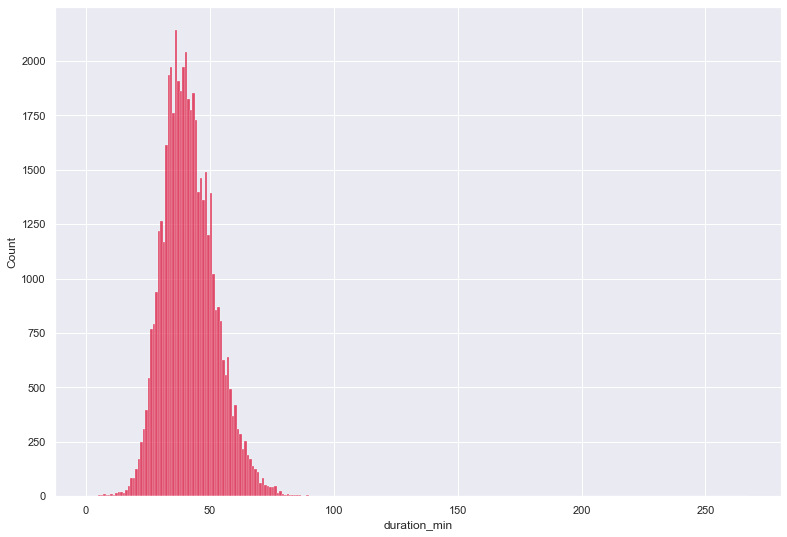

In [30]:
sns.histplot(data=df_match[['duration_min']], x="duration_min", palette = "Set1", color='#DC143C', bins=int(df_match["duration_min"].max() - df_match["duration_min"].min()))

Sure there is outlets. Lets fix that. Let's analyse 90% of matches

In [31]:
q1 = df_match['duration_min'].quantile(q=0.95)
q2 = df_match['duration_min'].quantile(q=0.05)

In [32]:
q1, q2

(60.0, 26.0)

In [33]:
df_match_outlets = df_match[df_match['duration_min'].between(q2, q1)]

In [34]:
import matplotlib.pyplot as plt

In [35]:
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

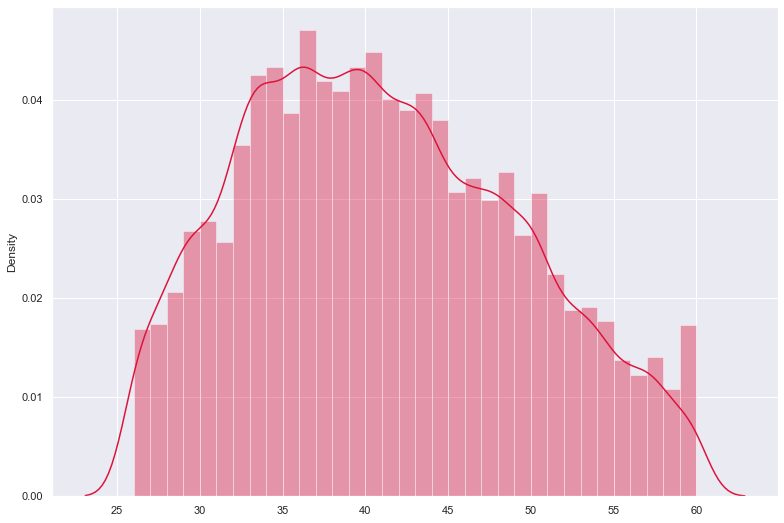

In [36]:
sns.distplot(df_match_outlets[['duration_min']], bins=int(q1 - q2), color='#DC143C')
plt.show()

This looks more like normal distribution, but still have work to do. The interquartile range tells you the spread of the middle half of your distribution.

In [37]:
Q3 = np.quantile(df_match['duration_min'], 0.75)
Q1 = np.quantile(df_match['duration_min'], 0.25)
IQR = Q3 - Q1
lowerRange = Q1 - 1.5 * IQR
upperRange = Q3 + 1.5 * IQR

In [38]:
lowerRange, upperRange

(13.0, 69.0)

In [39]:
dfIqr = df_match[df_match['duration_min'].between(lowerRange, upperRange)]

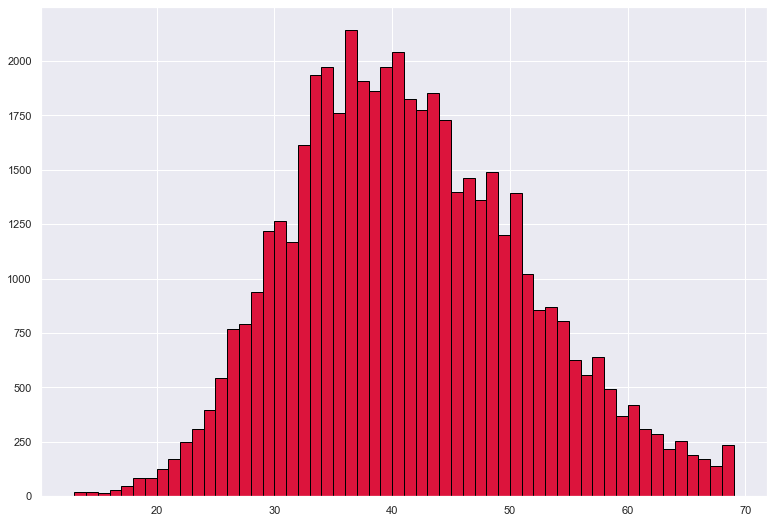

In [40]:
plt.hist(dfIqr[['duration_min']], bins=int(upperRange - lowerRange), color='#DC143C',  edgecolor = "black")
plt.show()

 Now this is much better

___

## Geting data insight

Usually players want to know meta heros and best items. Lest look at game from analytics point of view

### Enrich heros table

In [41]:
df_hero_names.head(3)

,name,hero_id,localized_name
0,npc_dota_hero_antimage,1,Anti-Mage
1,npc_dota_hero_axe,2,Axe
2,npc_dota_hero_bane,3,Bane


In [42]:
df_players.head(3)

,match_id,account_id,hero_id,player_slot,gold,gold_spent,gold_per_min,xp_per_min,kills,deaths,assists,denies,last_hits,stuns,hero_damage,hero_healing,tower_damage,item_0,item_1,item_2,item_3,item_4,item_5,level,leaver_status,xp_hero,xp_creep,xp_roshan,xp_other,gold_other,gold_death,gold_buyback,gold_abandon,gold_sell,gold_destroying_structure,gold_killing_heros,gold_killing_creeps,gold_killing_roshan,gold_killing_couriers,unit_order_none,unit_order_move_to_position,unit_order_move_to_target,unit_order_attack_move,unit_order_attack_target,unit_order_cast_position,unit_order_cast_target,unit_order_cast_target_tree,unit_order_cast_no_target,unit_order_cast_toggle,unit_order_hold_position,unit_order_train_ability,unit_order_drop_item,unit_order_give_item,unit_order_pickup_item,unit_order_pickup_rune,unit_order_purchase_item,unit_order_sell_item,unit_order_disassemble_item,unit_order_move_item,unit_order_cast_toggle_auto,unit_order_stop,unit_order_taunt,unit_order_buyback,unit_order_glyph,unit_order_eject_item_from_stash,unit_order_cast_rune,unit_order_ping_ability,unit_order_move_to_direction,unit_order_patrol,unit_order_vector_target_position,unit_order_radar,unit_order_set_item_combine_lock,unit_order_continue
0,0,0,86,0,3261,10960,347,362,9,3,18,1,30,76.7356,8690,218,143,180,37,73,56,108,0,16,0,8840.0,5440.0,NaN,83.0,50.0,-957.0,NaN,NaN,212.0,3120.0,5145.0,1087.0,400.0,NaN,NaN,4070.0,1.0,25.0,416.0,51.0,144.0,3.0,71.0,NaN,188.0,16.0,NaN,NaN,NaN,2.0,35.0,2.0,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1,51,1,2954,17760,494,659,13,3,18,9,109,87.4164,23747,0,423,46,63,119,102,24,108,22,0,14331.0,8440.0,2683.0,671.0,395.0,-1137.0,NaN,NaN,1650.0,3299.0,6676.0,4317.0,937.0,NaN,NaN,5894.0,214.0,165.0,1031.0,98.0,39.0,4.0,439.0,NaN,346.0,22.0,NaN,NaN,12.0,52.0,30.0,4.0,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,83,2,110,12195,350,385,0,4,15,1,58,None,4217,1595,399,48,60,59,108,65,0,17,0,6692.0,8112.0,NaN,453.0,259.0,-1436.0,-1015.0,NaN,NaN,3142.0,2418.0,3697.0,400.0,NaN,NaN,7053.0,3.0,132.0,645.0,36.0,160.0,20.0,373.0,NaN,643.0,17.0,5.0,NaN,7.0,8.0,28.0,NaN,1.0,18.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN


Start with win rate

$$
P(h) = g_{hero} / g_{total} * 100
$$
<br>
We can find the probability of encountering a hero in match with a simple formula

In [43]:
df_heros_in_match = df_players.groupby('match_id')['hero_id'].apply(list)

In [44]:
def find_populatity(hero_id):
    total = df_heros_in_match.map(lambda x: 1 if hero_id in x else 0).sum()
    percentage = total / len(df_heros_in_match)
    return percentage * 100

In [45]:
df_hero_names['popularity'] = df_hero_names.apply(lambda x: find_populatity(x['hero_id']), axis = 1)

In [46]:
df_hero_names.sort_values(by=['popularity'], ascending=False)[['localized_name', 'popularity']].head(10)

,localized_name,popularity
20,Windranger,41.762
10,Shadow Fiend,34.014
72,Invoker,23.352
6,Earthshaker,22.646
26,Slardar,22.362
37,Queen of Pain,21.180
7,Juggernaut,20.788
98,Tusk,20.612
71,Alchemist,19.646
13,Pudge,18.894


In [47]:
top5_popular = df_hero_names.sort_values(by=['popularity'], ascending=False)[['localized_name', 'popularity']].head(6)

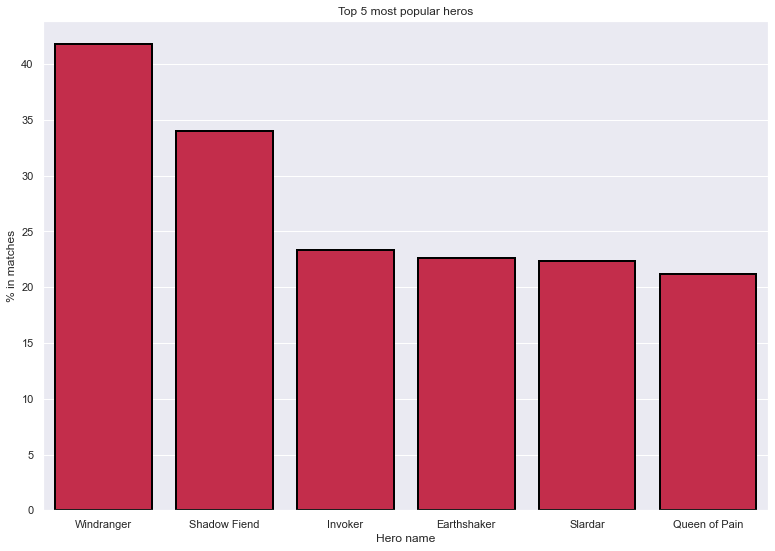

In [48]:
sns.barplot(data=top5_popular,
            x="localized_name",
            y="popularity",
            color='#DC143C',
            edgecolor='#000000',
            lw=2).set(xlabel='Hero name',
                      ylabel='% in matches',
                      title='Top 5 most popular heros')
plt.show()

___

#### Hero win rate

$$
P(w) = g_{win} / g_{total} * 100
$$

In [49]:
df_side = df_players[['match_id', 'hero_id', 'player_slot']]
df_side['dire'] = df_side['player_slot'].map(lambda x: 1 if x > 5 else 0)
df_side['radiant'] = df_side['player_slot'].map(lambda x: 1 if x < 5 else 0)
df_side.head(3)

,match_id,hero_id,player_slot,dire,radiant
0,0,86,0,0,1
1,0,51,1,0,1
2,0,83,2,0,1


__Note:__ Players with slots 0-4 is radiant and 5-9 is dire

In [50]:
df_match_result = df_match[['match_id', 'radiant_win']]
df_side = df_side.merge(df_match_result, how='left', on='match_id')
df_side.head()

,match_id,hero_id,player_slot,dire,radiant,radiant_win
0,0,86,0,0,1,True
1,0,51,1,0,1,True
2,0,83,2,0,1,True
3,0,11,3,0,1,True
4,0,67,4,0,1,True


In [51]:
def true_win(row):
    dire = row['dire']
    radiant = row['radiant']
    radiant_win = row['radiant_win']
    if radiant_win:
        return radiant
    else:
        return dire

In [52]:
df_side['win'] = df_side.apply(lambda row: true_win(row), axis = 1)

In [53]:
df_side.head(6)

,match_id,hero_id,player_slot,dire,radiant,radiant_win,win
0,0,86,0,0,1,True,1
1,0,51,1,0,1,True,1
2,0,83,2,0,1,True,1
3,0,11,3,0,1,True,1
4,0,67,4,0,1,True,1
5,0,106,128,1,0,True,0


In Dota, there cannot be a two same heros in a match

In [54]:
def calculate_win_rate(hero_id):
    total_matches = df_side[df_side['hero_id'] == hero_id]['match_id'].count()
    total_wins = df_side[df_side['hero_id'] == hero_id]['win'].sum()
    win_rate = total_wins / total_matches * 100
    return win_rate

In [55]:
df_hero_names['win_rate']= df_hero_names['hero_id'].map(lambda x: calculate_win_rate(x))

In [56]:
df_top5_win = df_hero_names.sort_values(by=['win_rate'], ascending=False)[['localized_name', 'win_rate']].head(10)

In [57]:
df_top5_win

,localized_name,win_rate
55,Omniknight,59.058322
65,Spectre,58.348348
40,Wraith King,57.967667
83,Undying,56.881196
100,Abaddon,56.858006
68,Ursa,56.810786
34,Necrophos,56.357849
29,Lich,56.005974
26,Slardar,55.934174
21,Zeus,55.502288


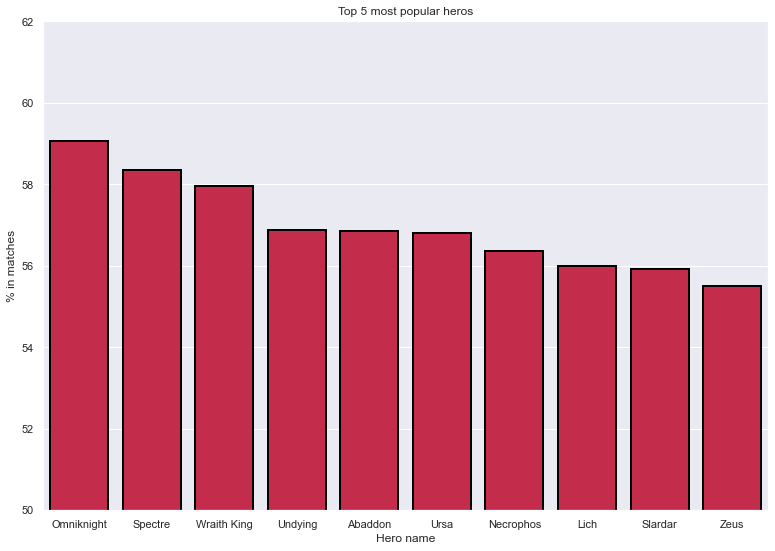

In [58]:
sns.barplot(data=df_top5_win,
            x="localized_name",
            y="win_rate",
            color='#DC143C',
            edgecolor='#000000',
            lw=2).set(xlabel='Hero name',
                      ylabel='% in matches',
                      title='Top 5 most popular heros')
plt.ylim(50, None)
plt.show()

___

#### Highest kills per match

In [59]:
df_kills = df_players[['match_id', 'hero_id', 'kills']]

In [60]:
def average_kills(hero_id):
    avg = df_kills[df_kills['hero_id'] == hero_id]['kills'].mean()
    return avg

In [61]:
df_hero_names["average_kills"] = df_hero_names['hero_id'].map(average_kills)

In [62]:
df_hero_names.sort_values(by=['average_kills'], ascending=False)[['localized_name', 'average_kills']].head(10)

,localized_name,average_kills
30,Riki,12.713768
68,Ursa,11.712459
37,Queen of Pain,10.824551
44,Templar Assassin,10.810659
57,Huskar,10.719461
91,Slark,10.600285
32,Tinker,10.509962
10,Shadow Fiend,10.304933
54,Clinkz,10.247681
21,Zeus,10.025278


___

#### XP & Gold per minute

In [63]:
df_hero_names['xpm'] = df_hero_names['hero_id'].map(lambda x: df_players[df_players['hero_id'] == x]['xp_per_min'].mean())

In [64]:
df_hero_names.sort_values(by=['xpm'], ascending=False)[['localized_name', 'xpm']].head(10)

,localized_name,xpm
80,Meepo,675.131138
0,Anti-Mage,580.392827
71,Alchemist,577.001832
44,Templar Assassin,574.769613
10,Shadow Fiend,572.849827
7,Juggernaut,549.420435
68,Ursa,548.004649
91,Slark,547.568004
46,Luna,543.310765
104,Ember Spirit,541.980353


In [65]:
df_hero_names['gpm'] = df_hero_names['hero_id'].map(lambda x: df_players[df_players['hero_id'] == x]['gold_per_min'].mean())

In [66]:
df_hero_names.sort_values(by=['gpm'], ascending=False)[['localized_name', 'gpm']].head(10)

,localized_name,gpm
71,Alchemist,709.545455
0,Anti-Mage,554.192742
10,Shadow Fiend,551.266302
44,Templar Assassin,523.577292
80,Meepo,522.703593
46,Luna,520.486543
7,Juggernaut,520.126515
70,Gyrocopter,500.291861
92,Medusa,497.504661
65,Spectre,495.294745


In [67]:
top10_xpm_gpm = df_hero_names.sort_values(by=['xpm'], ascending=False)[['localized_name', 'xpm', 'gpm']].head(10)

<AxesSubplot:xlabel='Hero name'>

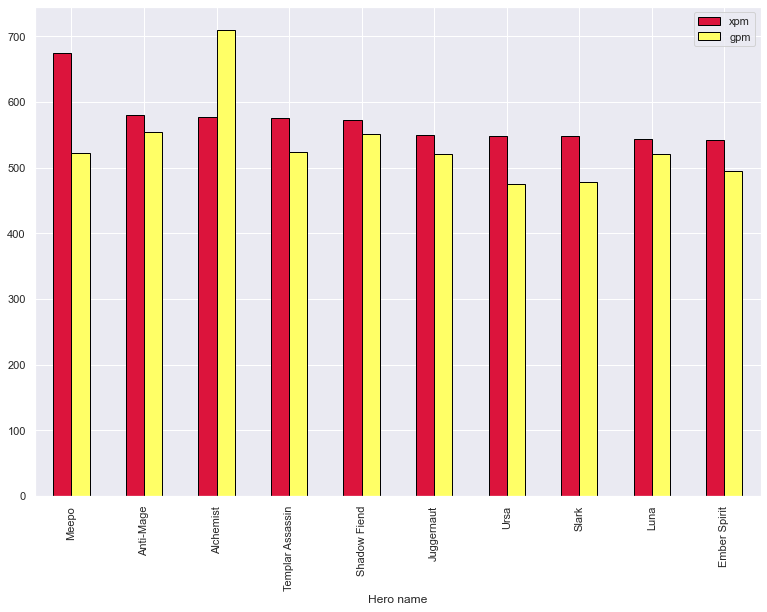

In [68]:
top10_xpm_gpm.set_index('localized_name').plot(kind="bar", color=['#DC143C', '#FFFF66'], edgecolor='black', xlabel="Hero name")

___

#### Enriched hero table

In [69]:
df_hero_names.head(15)

,name,hero_id,localized_name,popularity,win_rate,average_kills,xpm,gpm
0,npc_dota_hero_antimage,1,Anti-Mage,18.792,46.296296,7.340996,580.392827,554.192742
1,npc_dota_hero_axe,2,Axe,9.202,43.447077,8.525321,442.938274,400.109107
2,npc_dota_hero_bane,3,Bane,5.106,47.081864,4.766941,336.720329,295.293380
3,npc_dota_hero_bloodseeker,4,Bloodseeker,5.912,45.399188,9.657307,494.835927,447.641746
4,npc_dota_hero_crystal_maiden,5,Crystal Maiden,15.692,53.976549,4.483686,346.943411,314.668876
5,npc_dota_hero_drow_ranger,6,Drow Ranger,5.216,51.188650,6.869248,484.377301,459.554831
6,npc_dota_hero_earthshaker,7,Earthshaker,22.646,50.340016,4.931202,374.549589,334.294887
7,npc_dota_hero_juggernaut,8,Juggernaut,20.788,51.587454,9.552627,549.420435,520.126515
8,npc_dota_hero_mirana,9,Mirana,14.420,52.052705,6.374480,395.803606,368.332455
9,npc_dota_hero_morphling,10,Morphling,3.048,43.700787,7.646982,484.015748,437.419948


___

### Enrich items table

In [70]:
df_item_ids.head()

,item_id,item_name
0,1,blink
1,2,blades_of_attack
2,3,broadsword
3,4,chainmail
4,5,claymore


In [71]:
df_purchase_log.head()

,item_id,time,player_slot,match_id
0,44,-81,0,0
1,29,-63,0,0
2,43,6,0,0
3,84,182,0,0
4,46,197,0,0


### Top items

In [72]:
def items_percentage_in_matches(item):
    total = len(df_purchase_log['match_id'].unique())
    items = items_in_match.map(lambda x: 1 if item in x else 0).sum()
    return items/total * 100

In [73]:
items_in_match = df_purchase_log.groupby('match_id')['item_id'].apply(list)

In [74]:
df_item_ids['appear_percentage'] = df_item_ids.apply(lambda x: items_percentage_in_matches(x['item_id']), axis = 1)

___

### Top first 6 item picks

In [75]:
df_purchase_log.head()

,item_id,time,player_slot,match_id
0,44,-81,0,0
1,29,-63,0,0
2,43,6,0,0
3,84,182,0,0
4,46,197,0,0


In [76]:
def items_percentage_first_6(item):
    total = len(df_purchase_log['match_id'].unique())
    items = items_in_match_first_6.map(lambda x: 1 if item in x else 0).sum()
    return items/total * 100

In [77]:
df_purchase_log_first_6 = df_purchase_log.groupby(['match_id', 'player_slot']).head(6)
items_in_match_first_6 = df_purchase_log_first_6.groupby('match_id')['item_id'].apply(list)

In [78]:
df_item_ids['in_first_6'] = df_item_ids.apply(lambda x: items_percentage_first_6(x['item_id']), axis = 1)

In [79]:
df_item_ids.sort_values('in_first_6', ascending=False).head(10)

,item_id,item_name,appear_percentage,in_first_6
42,44,tango,100.000,100.000
43,45,courier,100.000,99.974
15,16,branches,99.998,99.800
36,38,clarity,99.672,99.104
40,42,ward_observer,99.946,98.772
28,29,boots,100.000,98.764
119,182,stout_shield,98.588,97.750
19,20,circlet,99.974,97.474
37,39,flask,98.378,95.560
44,46,tpscroll,99.998,91.800


___

## Predict model

In this chapter I will analyze first five mins logs and analyze factors that will help me predict outcome of the match

### Prepare data

To begin with, I will analyze only matches that last more than 15 minutes

In [80]:
df_match_for_analysis = df_match[df_match['duration_min'] > 15][['match_id', 'first_blood_time', 'radiant_win']]

Enrich data with GPM, LH and XPM

In [81]:
df_player_time_5_min = df_player_time[df_player_time['times'] < 301]

In [82]:
df_player_time_5_min.head(3)

,match_id,times,gold_t_0,lh_t_0,xp_t_0,gold_t_1,lh_t_1,xp_t_1,gold_t_2,lh_t_2,xp_t_2,gold_t_3,lh_t_3,xp_t_3,gold_t_4,lh_t_4,xp_t_4,gold_t_128,lh_t_128,xp_t_128,gold_t_129,lh_t_129,xp_t_129,gold_t_130,lh_t_130,xp_t_130,gold_t_131,lh_t_131,xp_t_131,gold_t_132,lh_t_132,xp_t_132
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,60,409,0,63,142,1,186,168,0,125,200,0,193,194,1,125,174,2,77,138,1,62,345,6,351,100,0,77,613,1,125
2,0,120,546,0,283,622,4,645,330,0,376,345,1,698,628,5,374,354,4,437,673,5,543,684,12,805,200,0,210,815,5,323


In [83]:
df_player_time_5_min['gold_t_r'] = df_player_time_5_min['gold_t_1'] + df_player_time_5_min['gold_t_2'] + df_player_time_5_min['gold_t_3'] + df_player_time_5_min['gold_t_4'] + df_player_time_5_min['gold_t_0']
df_player_time_5_min['lh_t_r'] = df_player_time_5_min['lh_t_0'] + df_player_time_5_min['lh_t_1'] + df_player_time_5_min['lh_t_2'] + df_player_time_5_min['lh_t_3'] + df_player_time_5_min['lh_t_4']
df_player_time_5_min['xp_t_r'] = df_player_time_5_min['xp_t_0'] + df_player_time_5_min['xp_t_1'] + df_player_time_5_min['xp_t_2'] + df_player_time_5_min['xp_t_3'] + df_player_time_5_min['xp_t_4']

df_player_time_5_min['gold_t_d'] = df_player_time_5_min['gold_t_128'] + df_player_time_5_min['gold_t_129'] + df_player_time_5_min['gold_t_130'] + df_player_time_5_min['gold_t_131'] + df_player_time_5_min['gold_t_132']
df_player_time_5_min['lh_t_d'] = df_player_time_5_min['lh_t_128'] + df_player_time_5_min['lh_t_129'] + df_player_time_5_min['lh_t_130'] + df_player_time_5_min['lh_t_131'] + df_player_time_5_min['lh_t_132']
df_player_time_5_min['xp_t_d'] = df_player_time_5_min['xp_t_128'] + df_player_time_5_min['xp_t_129'] + df_player_time_5_min['xp_t_130'] + df_player_time_5_min['xp_t_131'] + df_player_time_5_min['xp_t_132']

In [84]:
df_player_time_5_min = df_player_time_5_min[['match_id', 'times', 'gold_t_r', 'lh_t_r','xp_t_r','gold_t_d','lh_t_d','xp_t_d']]

In [85]:
df_player_time_5_min_sum = df_player_time_5_min.groupby("match_id").sum()

In [86]:
df_player_time_5_min_sum.head()

,times,gold_t_r,lh_t_r,xp_t_r,gold_t_d,lh_t_d,xp_t_d
match_id,,,,,,,
0,900,17971,114,18471,20637,200,18134
1,900,15743,163,15001,19164,169,17249
2,900,15690,147,17671,13179,100,16446
3,900,14252,88,15816,15398,121,16217
4,900,19958,187,16293,15805,123,14025


In [87]:
df_match_5_min = df_match_for_analysis.merge(df_player_time_5_min_sum, on='match_id')

In [88]:
df_match_5_min.head(3)

,match_id,first_blood_time,radiant_win,times,gold_t_r,lh_t_r,xp_t_r,gold_t_d,lh_t_d,xp_t_d
0,0,1,True,900,17971,114,18471,20637,200,18134
1,1,221,False,900,15743,163,15001,19164,169,17249
2,2,190,False,900,15690,147,17671,13179,100,16446


___

Enrich data with massages about First Blood, Roshan Kill and Tower Kill Messages

In [89]:
df_objectives.head(5)

,match_id,key,player1,player2,slot,subtype,team,time,value
0,0,NaN,0,6,0.0,CHAT_MESSAGE_FIRSTBLOOD,NaN,1,309
1,0,NaN,3,-1,3.0,CHAT_MESSAGE_TOWER_KILL,2.0,894,2
2,0,NaN,2,-1,NaN,CHAT_MESSAGE_ROSHAN_KILL,2.0,925,200
3,0,NaN,1,-1,1.0,CHAT_MESSAGE_AEGIS,NaN,925,0
4,0,NaN,7,-1,7.0,CHAT_MESSAGE_TOWER_KILL,3.0,1016,3


In [90]:
df_objectives_5_min = df_objectives[df_objectives['time'] < 301]

In [91]:
def team_r(row, message):
    if row['subtype'] == message:
        if row['player1'] < 5:
            return 1
        else:
            return 0

In [92]:
def team_d(row, message):
    if row['subtype'] == message:
        if row['player1'] > 4:
            return 1
        else:
            return 0

In [93]:
df_objectives_5_min['roshan_radiant'] = df_objectives_5_min.apply(lambda x: team_r(x, 'CHAT_MESSAGE_ROSHAN_KILL'), axis = 1)
df_objectives_5_min['roshan_dire'] = df_objectives_5_min.apply(lambda x: team_d(x, 'CHAT_MESSAGE_ROSHAN_KILL'), axis = 1)
#
df_objectives_5_min['firstblood_radiant'] = df_objectives_5_min.apply(lambda x: team_r(x, 'CHAT_MESSAGE_FIRSTBLOOD'), axis = 1)
df_objectives_5_min['firstblood_dire'] = df_objectives_5_min.apply(lambda x: team_d(x, 'CHAT_MESSAGE_FIRSTBLOOD'), axis = 1)

df_objectives_5_min['tower_radiant'] = df_objectives_5_min.apply(lambda x: team_r(x, 'CHAT_MESSAGE_TOWER_KILL'), axis = 1)
df_objectives_5_min['tower_dire'] = df_objectives_5_min.apply(lambda x: team_d(x, 'CHAT_MESSAGE_TOWER_KILL'), axis = 1)

In [94]:
df_objectives_5_min.head(10)

,match_id,key,player1,player2,slot,subtype,team,time,value,roshan_radiant,roshan_dire,firstblood_radiant,firstblood_dire,tower_radiant,tower_dire
0,0,NaN,0,6,0.0,CHAT_MESSAGE_FIRSTBLOOD,NaN,1,309,NaN,NaN,1.0,0.0,NaN,NaN
21,1,NaN,2,9,2.0,CHAT_MESSAGE_FIRSTBLOOD,NaN,222,477,NaN,NaN,1.0,0.0,NaN,NaN
47,2,NaN,8,2,8.0,CHAT_MESSAGE_FIRSTBLOOD,NaN,190,436,NaN,NaN,0.0,1.0,NaN,NaN
68,3,NaN,9,2,9.0,CHAT_MESSAGE_FIRSTBLOOD,NaN,41,310,NaN,NaN,0.0,1.0,NaN,NaN
95,4,NaN,3,7,3.0,CHAT_MESSAGE_FIRSTBLOOD,NaN,59,402,NaN,NaN,1.0,0.0,NaN,NaN
117,5,NaN,3,9,3.0,CHAT_MESSAGE_FIRSTBLOOD,NaN,113,497,NaN,NaN,1.0,0.0,NaN,NaN
132,6,NaN,5,2,5.0,CHAT_MESSAGE_FIRSTBLOOD,NaN,4,288,NaN,NaN,0.0,1.0,NaN,NaN
156,7,NaN,2,9,2.0,CHAT_MESSAGE_FIRSTBLOOD,NaN,256,428,NaN,NaN,1.0,0.0,NaN,NaN
177,8,NaN,2,9,2.0,CHAT_MESSAGE_FIRSTBLOOD,NaN,4,341,NaN,NaN,1.0,0.0,NaN,NaN
199,9,NaN,2,8,2.0,CHAT_MESSAGE_FIRSTBLOOD,NaN,85,354,NaN,NaN,1.0,0.0,NaN,NaN


In [95]:
df_objectives_5_min = df_objectives_5_min[['match_id', 'roshan_radiant', 'roshan_dire', 'firstblood_radiant', 'firstblood_dire', 'tower_radiant', 'tower_dire']]

In [96]:
df_objectives_5_min.fillna(0, inplace=True)

In [97]:
df_objectives_5_min.head()

,match_id,roshan_radiant,roshan_dire,firstblood_radiant,firstblood_dire,tower_radiant,tower_dire
0,0,0.0,0.0,1.0,0.0,0.0,0.0
21,1,0.0,0.0,1.0,0.0,0.0,0.0
47,2,0.0,0.0,0.0,1.0,0.0,0.0
68,3,0.0,0.0,0.0,1.0,0.0,0.0
95,4,0.0,0.0,1.0,0.0,0.0,0.0


In [98]:
df_objectives_5_min_sum = df_objectives_5_min.groupby('match_id').sum()

In [99]:
df_match_5_min_obj = df_match_5_min.merge(df_objectives_5_min_sum, on='match_id')

In [100]:
df_match_5_min_obj.head()

,match_id,first_blood_time,radiant_win,times,gold_t_r,lh_t_r,xp_t_r,gold_t_d,lh_t_d,xp_t_d,roshan_radiant,roshan_dire,firstblood_radiant,firstblood_dire,tower_radiant,tower_dire
0,0,1,True,900,17971,114,18471,20637,200,18134,0.0,0.0,1.0,0.0,0.0,0.0
1,1,221,False,900,15743,163,15001,19164,169,17249,0.0,0.0,1.0,0.0,0.0,0.0
2,2,190,False,900,15690,147,17671,13179,100,16446,0.0,0.0,0.0,1.0,0.0,0.0
3,3,40,False,900,14252,88,15816,15398,121,16217,0.0,0.0,0.0,1.0,0.0,0.0
4,4,58,True,900,19958,187,16293,15805,123,14025,0.0,0.0,1.0,0.0,0.0,0.0


___

### Compare stats in win situation and lose situtions

#### Average GPM

$$
\bar{GPM} = \frac{\sum\limits_{i=1}^{n}GPM(rad) + \sum\limits_{i=1}^{m}GPM(dire)}{n + m}
$$

In [101]:
#win
GPM_rad_win = df_match_5_min_obj[df_match_5_min_obj['radiant_win'] == True]['gold_t_r'].sum()
n_win = df_match_5_min_obj[df_match_5_min_obj['radiant_win'] == True]['gold_t_r'].count()

GPM_dire_win = df_match_5_min_obj[df_match_5_min_obj['radiant_win'] == False]['gold_t_d'].sum()
m_win = df_match_5_min_obj[df_match_5_min_obj['radiant_win'] == False]['gold_t_d'].count()

In [102]:
#lost
GPM_rad_lost = df_match_5_min_obj[df_match_5_min_obj['radiant_win'] == False]['gold_t_r'].sum()
n_lost = df_match_5_min_obj[df_match_5_min_obj['radiant_win'] == False]['gold_t_r'].count()

GPM_dire_lost = df_match_5_min_obj[df_match_5_min_obj['radiant_win'] == True]['gold_t_d'].sum()
m_lost = df_match_5_min_obj[df_match_5_min_obj['radiant_win'] == True]['gold_t_d'].count()

In [103]:
mean_win_gpm = (GPM_rad_win + GPM_dire_win) / (n_win + m_win)

In [104]:
mean_lose_gpm = (GPM_rad_lost + GPM_dire_lost) / (n_lost + m_lost)

In [105]:
mean_win_gpm, mean_lose_gpm

(17024.757120034083, 16202.210437746298)

How much is avegate difference between GPM?

In [106]:
mean_win_gpm / mean_lose_gpm

1.0507675594912345

___

#### Average XPM

In [107]:
#win
XPM_rad_win = df_match_5_min_obj[df_match_5_min_obj['radiant_win'] == True]['xp_t_r'].sum()
n_win = df_match_5_min_obj[df_match_5_min_obj['radiant_win'] == True]['xp_t_r'].count()

XPM_dire_win = df_match_5_min_obj[df_match_5_min_obj['radiant_win'] == False]['xp_t_d'].sum()
m_win = df_match_5_min_obj[df_match_5_min_obj['radiant_win'] == False]['xp_t_d'].count()

#lost
XPM_rad_lost = df_match_5_min_obj[df_match_5_min_obj['radiant_win'] == False]['xp_t_r'].sum()
n_lost = df_match_5_min_obj[df_match_5_min_obj['radiant_win'] == False]['xp_t_r'].count()

XPM_dire_lost = df_match_5_min_obj[df_match_5_min_obj['radiant_win'] == True]['xp_t_d'].sum()
m_lost = df_match_5_min_obj[df_match_5_min_obj['radiant_win'] == True]['xp_t_d'].count()

In [108]:
mean_win_xpm = (XPM_rad_win + XPM_dire_win) / (n_win + m_win)
mean_lose_xpm = (XPM_rad_lost + XPM_dire_lost) / (n_lost + m_lost)

In [109]:
mean_win_xpm, mean_lose_xpm

(17459.853424219833, 16924.87089146874)

How much is avegate difference between GPM?

In [110]:
mean_win_xpm / mean_lose_xpm

1.0316092533988404

So, there is __5%__ difference in Gold and __3%__ in experience. Let's compare that using boxplot

In [111]:
rad_win_xpm = df_match_5_min_obj[df_match_5_min_obj['radiant_win'] == True]['xp_t_r'].values
dire_win_xpm = df_match_5_min_obj[df_match_5_min_obj['radiant_win'] == False]['xp_t_d'].values
win_xpm = np.concatenate((rad_win_xpm, dire_win_xpm), axis=None)

In [112]:
rad_lost_xpm = df_match_5_min_obj[df_match_5_min_obj['radiant_win'] == False]['xp_t_r'].values
dire_lost_xpm = df_match_5_min_obj[df_match_5_min_obj['radiant_win'] == True]['xp_t_d'].values
lost_xpm = np.concatenate((rad_lost_xpm, dire_lost_xpm), axis=None)

In [113]:
rad_win_gold = df_match_5_min_obj[df_match_5_min_obj['radiant_win'] == True]['gold_t_r'].values
dire_win_gold = df_match_5_min_obj[df_match_5_min_obj['radiant_win'] == False]['gold_t_d'].values
win_xpm = np.concatenate((rad_win_gold, dire_win_gold), axis=None)

In [114]:
rad_lost_gold = df_match_5_min_obj[df_match_5_min_obj['radiant_win'] == False]['gold_t_r'].values
dire_lost_gold = df_match_5_min_obj[df_match_5_min_obj['radiant_win'] == True]['gold_t_d'].values
lost_xpm = np.concatenate((rad_lost_gold, dire_lost_gold), axis=None)

In [115]:
win_dict = {'Win XPM': win_xpm,
            'Lost XPM': lost_xpm}
lost_dict = {'Win GPM': win_xpm,
             'Lost GPM': lost_xpm}

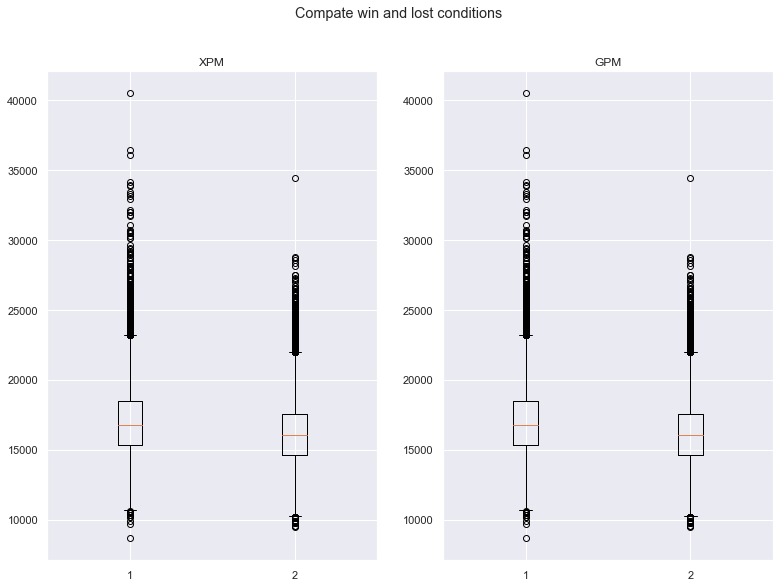

In [116]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Compate win and lost conditions')
ax1.boxplot(win_dict.values())
ax1.set_title('XPM')
ax2.boxplot(lost_dict.values())
ax2.set_title('GPM')
plt.show()

___

#### First blood

Let's check how offen do you win after First Blood

$$
P(FB) = \frac{\sum\limits_{i=1}^{n}FB∩win}{\sum\limits_{i=1}^{m}win} =  \frac{\sum\limits_{}^{}fb(win∩rad) + \sum\limits_{}^{}fb(win∩dire)}{\sum\limits_{}^{}fb∩rad+\sum\limits_{}^{}fb∩dire}
$$

In [117]:
fb_radiant = df_match_5_min_obj[(df_match_5_min_obj['firstblood_radiant'] == 1.0)]['match_id'].count()
fb_dire = df_match_5_min_obj[(df_match_5_min_obj['firstblood_radiant'] == 1.0)]['match_id'].count()

In [118]:
fb_radiant_win = df_match_5_min_obj[(df_match_5_min_obj['firstblood_radiant'] == 1.0) & (df_match_5_min_obj['radiant_win'] == True)]['match_id'].count()
fb_radiant_dire = df_match_5_min_obj[(df_match_5_min_obj['firstblood_dire'] == 1.0) & (df_match_5_min_obj['radiant_win'] == False)]['match_id'].count()

In [119]:
(fb_radiant_win + fb_radiant_dire) / (fb_radiant + fb_dire) * 100

56.23102281599722

The team that draws first blood wins a little more often

#### Roshan

In [120]:
roshan_radiant = df_match_5_min_obj[(df_match_5_min_obj['roshan_radiant'] == 1.0)]['match_id'].count()
roshan_dire = df_match_5_min_obj[(df_match_5_min_obj['roshan_dire'] == 1.0)]['match_id'].count()

In [121]:
roshan_radiant_win = df_match_5_min_obj[(df_match_5_min_obj['roshan_radiant'] == 1.0) & (df_match_5_min_obj['radiant_win'] == True)]['match_id'].count()
roshan_dire_win = df_match_5_min_obj[(df_match_5_min_obj['roshan_dire'] == 1.0) & (df_match_5_min_obj['radiant_win'] == False)]['match_id'].count()

In [122]:
(roshan_radiant_win + roshan_dire_win) / (roshan_radiant + roshan_dire) * 100

46.835443037974684

Interesing enouht, killing Roshan ASAP isn't best strategy

___

#### Tower kill

In [123]:
tower_radiant = df_match_5_min_obj[(df_match_5_min_obj['tower_radiant'] == 1.0)]['match_id'].count()
tower_dire = df_match_5_min_obj[(df_match_5_min_obj['tower_dire'] == 1.0)]['match_id'].count()

In [124]:
tower_radiant_win = df_match_5_min_obj[(df_match_5_min_obj['tower_radiant'] == 1.0) & (df_match_5_min_obj['radiant_win'] == True)]['match_id'].count()
tower_dire_win = df_match_5_min_obj[(df_match_5_min_obj['tower_dire'] == 1.0) & (df_match_5_min_obj['radiant_win'] == False)]['match_id'].count()

In [125]:
(tower_radiant_win + tower_dire_win) / (tower_radiant + tower_dire) * 100

51.83673469387755

Also, killing tower at first 5 min helps winning

___